# **🌟 Introduction 🌟**
**Welcome to this Jupyter Notebook! In this notebook, we will explore a customer dataset and apply data analysis and machine learning techniques. Our goal is to gain insights, make predictions, and visualize the data using various techniques.**

***Let's dive in and uncover the hidden patterns! 📊🔍***

# **📚 Importing Libraries**

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **📂 Read Data: Loading and Inspecting the Dataset**

In [3]:
df=pd.read_csv("https://github.com/I-AdityaGoyal/Data_Analysis/blob/main/customer_data.csv")

In [4]:
df.head()

name  age  gender    education  income   country  \
0  Teresa Williams MD   42  Female  High School   53936  Slovenia   
1     Christine Myers   49  Female       Master   82468     Aruba   
2       Dwayne Moreno   55    Male     Bachelor   56941    Cyprus   
3          Amy Norton   24  Female     Bachelor   60651     Palau   
4         Tonya Adams   64    Male       Master   81884    Zambia   

   purchase_frequency   spending  
0                 0.9  13227.120  
1                 0.6  12674.040  
2                 0.3   5354.115  
3                 0.2   2606.510  
4                 0.9  18984.780

In [6]:
df.shape

(1000, 8)

# **ℹ️ Data Information: Understanding the Dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   education           1000 non-null   object 
 4   income              1000 non-null   int64  
 5   country             1000 non-null   object 
 6   purchase_frequency  1000 non-null   float64
 7   spending            1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [10]:
df.describe()

age        income  purchase_frequency      spending
count  1000.000000   1000.000000         1000.000000   1000.000000
mean     41.754000  59277.852000            0.554600   9613.296835
std      13.778582  23258.377128            0.284675   5484.707210
min      18.000000  20031.000000            0.100000    611.985000
25%      30.000000  38825.500000            0.300000   5020.425000
50%      42.000000  58972.000000            0.600000   9430.395000
75%      54.000000  79114.000000            0.800000  13645.507500
max      65.000000  99780.000000            1.000000  25546.500000

In [11]:
df.dtypes

name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

In [12]:
df.isnull().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

# **📊 Data Visualization:**

**📈 Distplot: Analyzing Univariate Distributions**

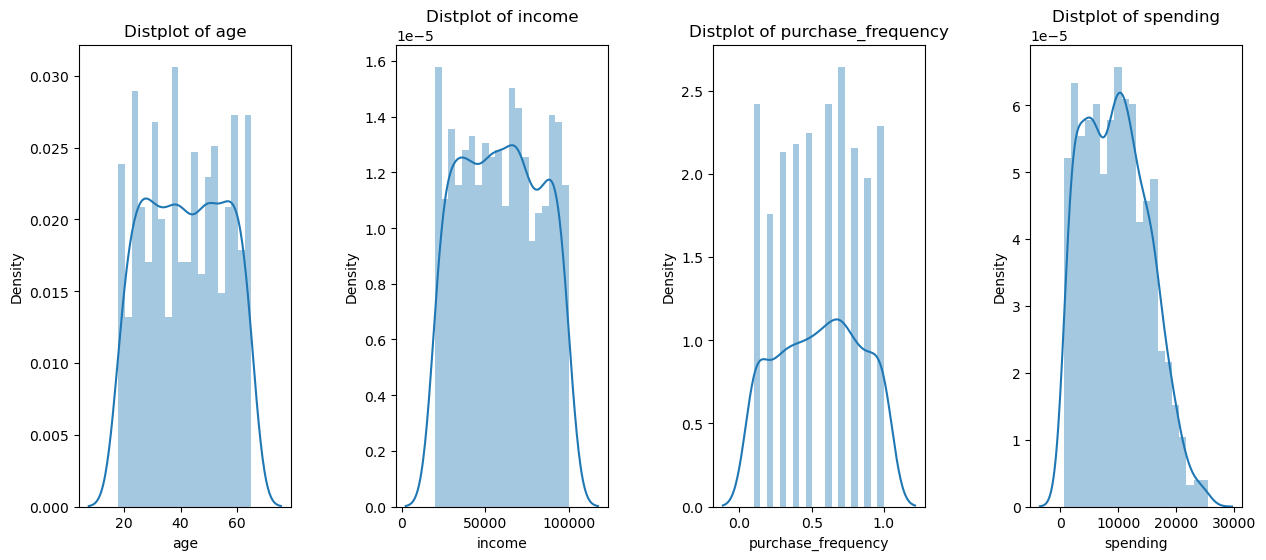

In [16]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['age' , 'income' , 'purchase_frequency', 'spending']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

**📊 Count Plot: Analyzing Categorical Variables**

<Axes: xlabel='count', ylabel='gender'>

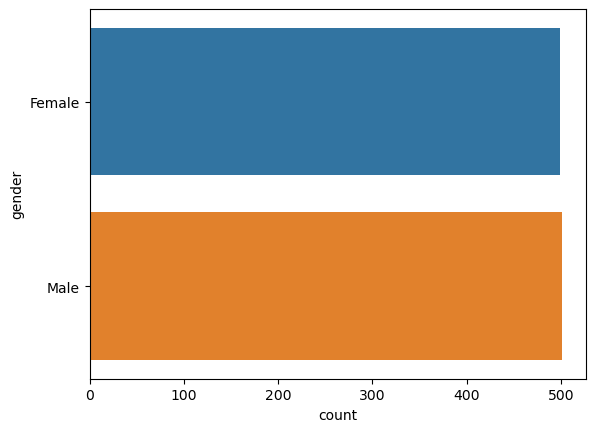

In [104]:
sns.countplot(data=df,y='gender')

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150'),
  Text(0, 200.0, '200'),
  Text(0, 250.0, '250'),
  Text(0, 300.0, '300')])

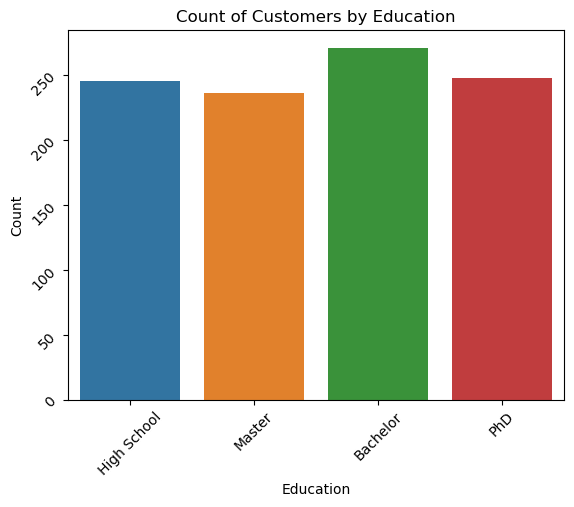

In [105]:
sns.countplot(x='education', data=df)
plt.title('Count of Customers by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=45)


**🌟 Scatter Plot: Visualizing Relationships between Variables**

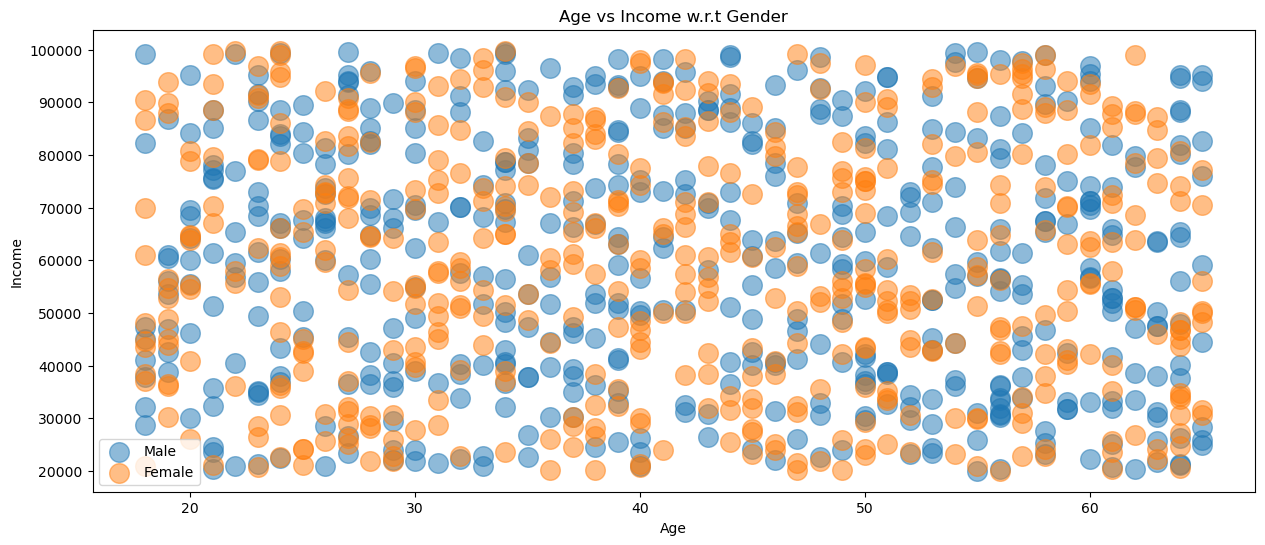

In [25]:

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'age' , y = 'income' , data = df[df['gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Income') 
plt.title('Age vs Income w.r.t Gender')
plt.legend()
plt.show()

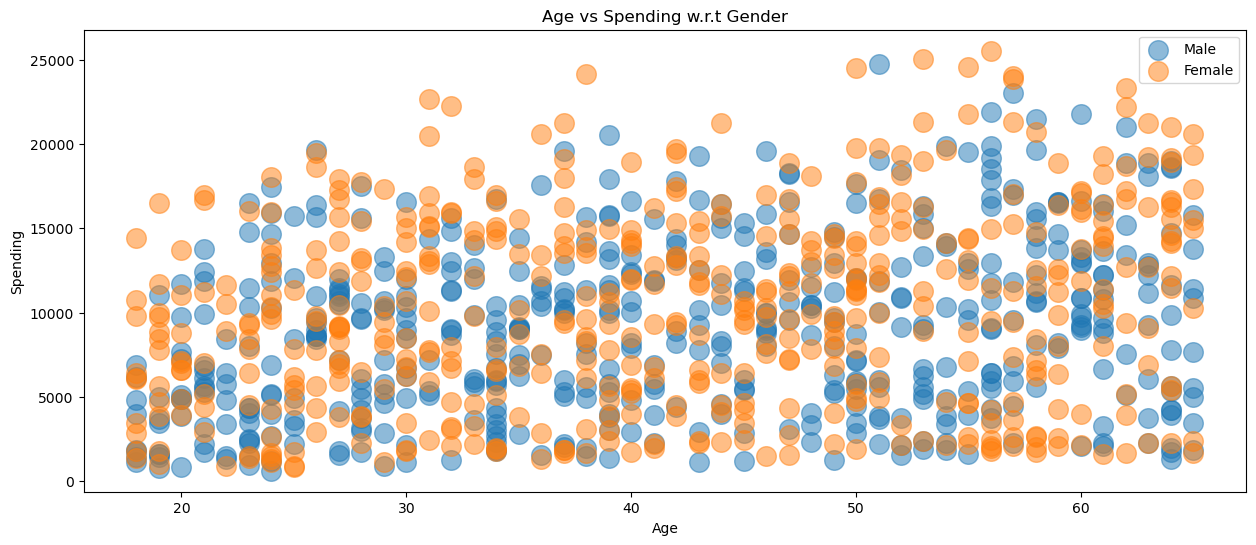

In [26]:

plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'age' , y = 'spending' , data = df[df['gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending') 
plt.title('Age vs Spending w.r.t Gender')
plt.legend()
plt.show()

**🌐 Pairplot: Visualizing Multivariate Relationships**

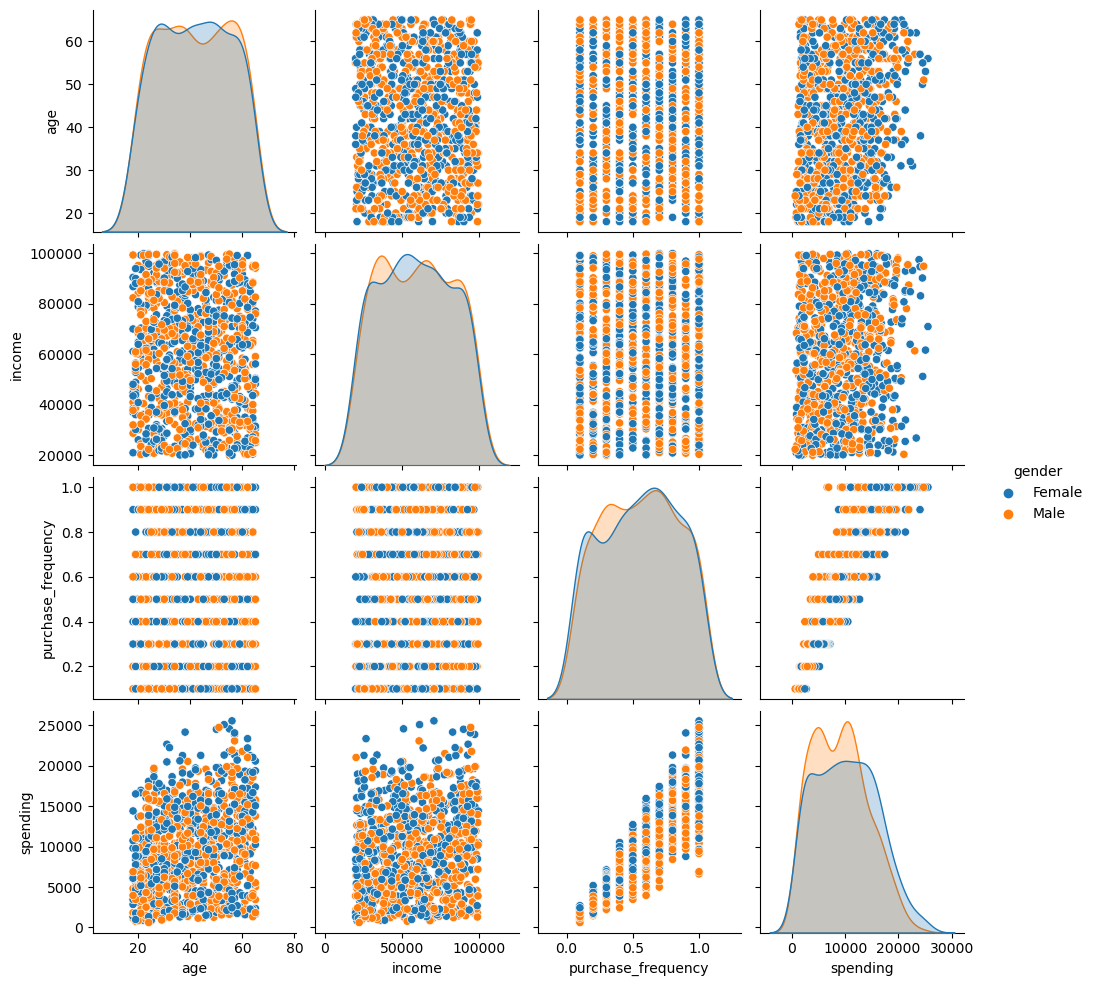

In [30]:
sns.pairplot(df,hue='gender')

**🎻 Violin Plot: Displaying Data Distribution with Violin Plots**

**🐝 Swarm Plot: Visualizing Categorical Data Distribution with Swarm Plots**

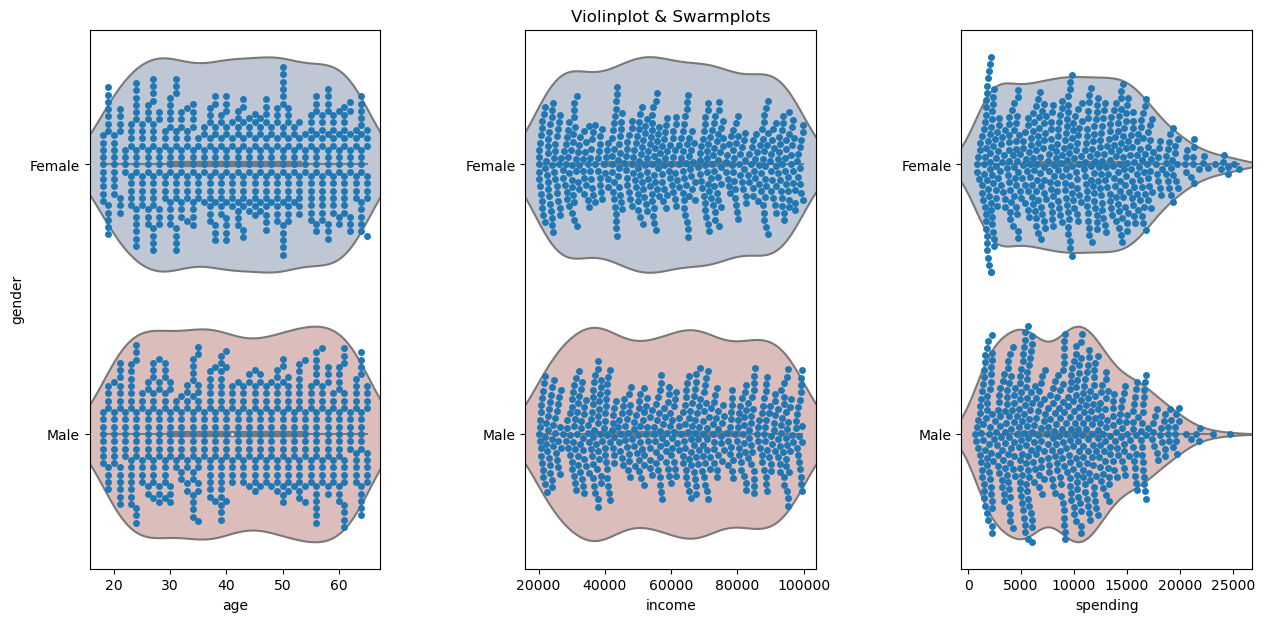

In [115]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['age' , 'income' , 'spending']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'gender' , data = df)
    plt.ylabel('gender' if n == 1 else '')
    plt.title('Violinplot & Swarmplots' if n == 2 else '')
plt.show()

**📦 Box Plot: Exploring Data Distribution and Outliers**

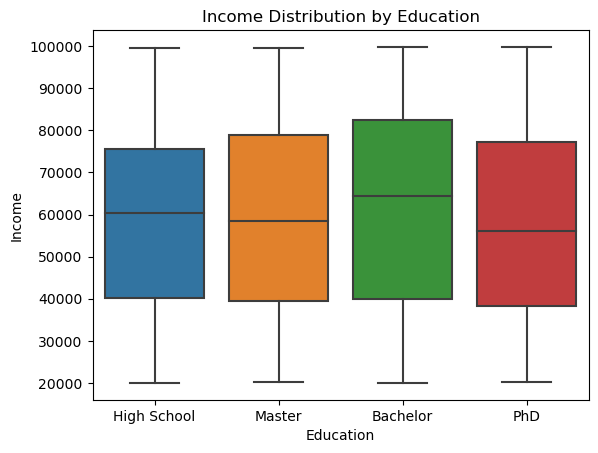

In [40]:
sns.boxplot(x='education', y='income', data=df)
plt.title('Income Distribution by Education')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()


**📊 Bar Plot: Representing Categorical Data with Bars**

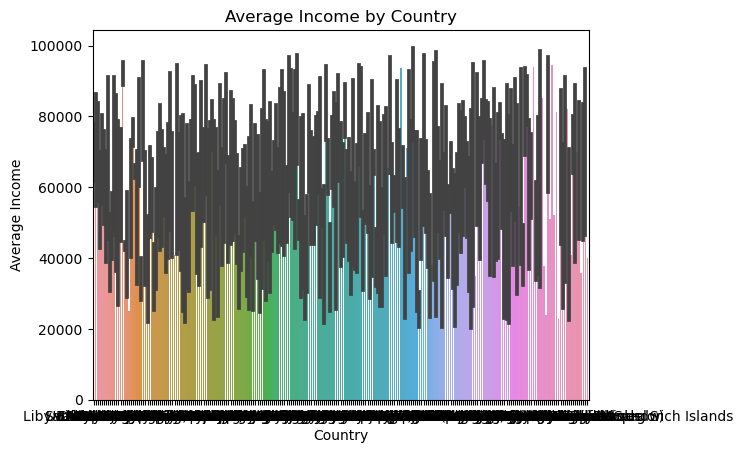

In [41]:
sns.barplot(x='country', y='income', data=df)
plt.title('Average Income by Country')
plt.xlabel('Country')
plt.ylabel('Average Income')
plt.show()


# **🧩 K-Nearest Neighbors (KNN) Algorithm: Implementation and Analysis**

Accuracy:  0.0


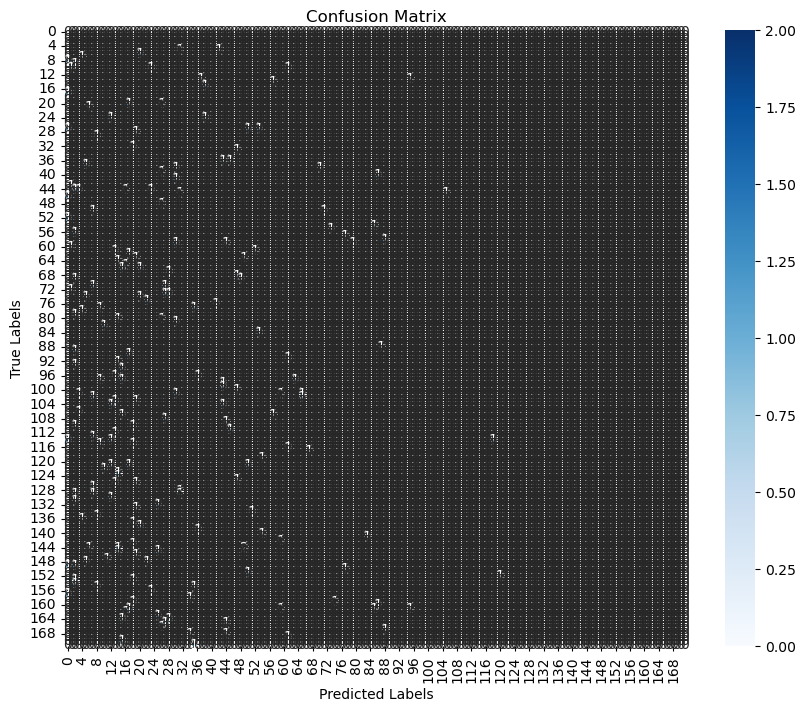

In [106]:
x=df[['age','income','purchase_frequency','spending']]
y=df['country']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

acc=accuracy_score(y_test,y_pred)
print('Accuracy: ',acc)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# **➗ Linear Regression: Model Training and Evaluation**

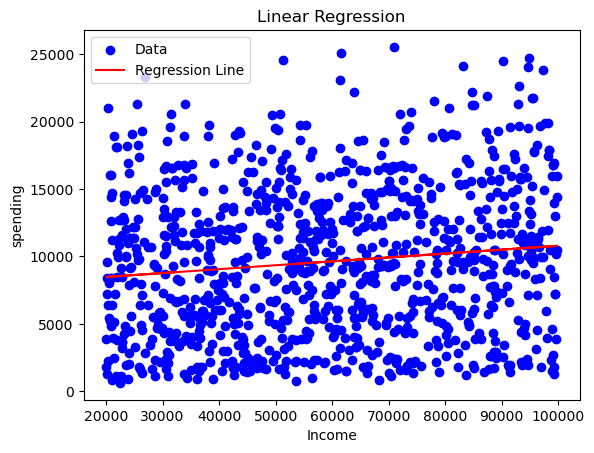

In [79]:
x=df['income'].values.reshape(-1,1)
y=df['spending'].values.reshape(-1,1)

model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
coef=model.coef_[0]
intercept = model.intercept_

plt.scatter(x,y,color='blue',label='Data')
plt.plot(x,y_pred,color='red',label='Regression Line')
plt.xlabel('Income')
plt.ylabel('spending')
plt.title('Linear Regression')
plt.legend()


# **🔢 K-means Clustering: Algorithm Application and Visualization**

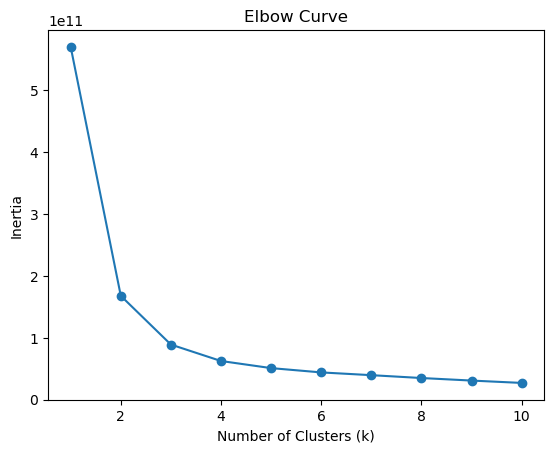

In [101]:
X = df[['age', 'income', 'spending']].values

k_values = list(range(1, 11))
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal k value
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()




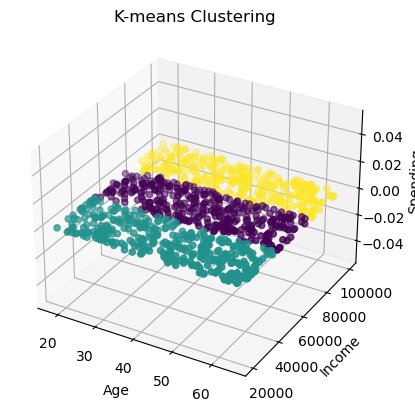

In [119]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending')
ax.set_title('K-means Clustering')

plt.show()

In [124]:
best_k = 3  
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
df['Cluster'] = labels

fig = px.scatter_3d(df, x='age', y='income', z='spending', color='Cluster')

fig.update_layout(title='K-means Clustering',scene=dict(
    xaxis_title='Age',
    yaxis_title='Income',
    zaxis_title='Education',
))
fig.show(renderer='notebook')

# fig.show()

# **✨ Conclusion ✨**
**We have reached the end of this data analysis journey. By using data visualization techniques like scatter plots, count plots, box plots, violin plots, and swarm plots, we gained a visual understanding of the dataset. Applying machine learning algorithms such as KNN, linear regression, and K-means clustering allowed us to make predictions and discover meaningful clusters. Feel free to further explore and build upon this analysis to drive valuable insights for your own projects. Thank you for joining us on this data-driven adventure! 🚀🔬📈**

***If you have any questions or need further assistance, please let us know. Enjoy analyzing your data! 💡📊***

**If you found this notebook helpful and enjoyed working with it, please consider giving it an upvote! Your support motivates us to continue creating valuable content for the data science community. Thank you in advance for your support! 🙌👍**
